In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Package

In [ ]:
# Basic
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import pickle
from functools import reduce


import geopandas as gpd

#  Clustering
from sklearn.preprocessing import StandardScaler #
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

# PCA
from sklearn.decomposition import PCA

%matplotlib inline

In [ ]:
os.chdir("/content/drive/MyDrive/대학원/3학기/빅데이터/광진구/광진구 빅데이터 공모전/3. 데이터 분석/2. 데이터 분석(Python)/Data")

# Utils

In [ ]:
def remove_outliers(df, column_name):
  """
  This function removes outliers from a specific column of a dataframe using the interquartile range (IQR) method.
  """
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Load Data

In [ ]:
with open(f'./processed_data.pkl', 'rb') as f:
    data_dict = pickle.load(f)

In [ ]:
work_pop = data_dict["work_pop"][["행정동_코드_명", "기준_년분기_코드","연령대_2030_직장_인구_수"]].copy()

In [ ]:
filtered_work_pop = work_pop.groupby('행정동_코드_명').apply(lambda x: x.loc[x['기준_년분기_코드'].idxmax()]).reset_index(drop = True)

In [ ]:
filtered_work_pop.drop(columns=["기준_년분기_코드"], inplace = True)

In [ ]:
filtered_work_pop.head()

,행정동_코드_명,연령대_2030_직장_인구_수
0,광장동,9528
1,구의1동,1414
2,구의2동,1325
3,구의3동,4249
4,군자동,789


In [ ]:
filtered_work_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   행정동_코드_명          15 non-null     object
 1   연령대_2030_직장_인구_수  15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [ ]:
land_money_shp = gpd.read_file("./광진구_공시지가_shp/광진구_공시지가.shp")

In [ ]:
land_money_shp.head()

,ADSTRD_CD,ADSTRD_NM,XCNTS_VALU,YDNTS_VALU,RELM_AR,index_righ,A0,A1,A2,A3,...,A11,A12,A13,A14,A15,A16,A17,A18,A19,geometry
0,11215840,자양3동,206277.0,447988.0,1196419.0,267004,1121510500104100001,1121510500,¼­¿ïÆ¯º°½Ã ±¤Áø±¸ ÀÚ¾çµ¿,1,...,None,None,NaN,2024-01-20,11215,473500.0,436000.0,411000.0,390000.0,"POLYGON ((206502.191 448833.470, 206557.876 44..."
1,11215830,자양2동,207314.0,447737.0,1657523.0,267004,1121510500104100001,1121510500,¼­¿ïÆ¯º°½Ã ±¤Áø±¸ ÀÚ¾çµ¿,1,...,None,None,NaN,2024-01-20,11215,473500.0,436000.0,411000.0,390000.0,"POLYGON ((207902.011 448705.361, 207904.682 44..."
2,11215840,자양3동,206277.0,447988.0,1196419.0,313646,1121510500107040003,1121510500,¼­¿ïÆ¯º°½Ã ±¤Áø±¸ ÀÚ¾çµ¿,1,...,None,None,NaN,2024-01-20,11215,473500.0,436000.0,411000.0,390000.0,"POLYGON ((206502.191 448833.470, 206557.876 44..."
3,11215830,자양2동,207314.0,447737.0,1657523.0,313646,1121510500107040003,1121510500,¼­¿ïÆ¯º°½Ã ±¤Áø±¸ ÀÚ¾çµ¿,1,...,None,None,NaN,2024-01-20,11215,473500.0,436000.0,411000.0,390000.0,"POLYGON ((207902.011 448705.361, 207904.682 44..."
4,11215840,자양3동,206277.0,447988.0,1196419.0,492730,1121510500107470001,1121510500,¼­¿ïÆ¯º°½Ã ±¤Áø±¸ ÀÚ¾çµ¿,1,...,None,None,NaN,2024-01-20,11215,2001000.0,1730000.0,1356000.0,1270000.0,"POLYGON ((206502.191 448833.470, 206557.876 44..."


In [ ]:
gwangjin_land_money_shp = land_money_shp[["ADSTRD_NM","A16"]].copy()

In [ ]:
gwangjin_land_money_shp.rename(columns = {"ADSTRD_NM": "행정동_코드_명"}, inplace = True)

In [ ]:
gwangjin_land_money_shp_filtered = gwangjin_land_money_shp.groupby('행정동_코드_명').apply(lambda x: remove_outliers(x, 'A16')).reset_index(drop = True)

In [ ]:
gwangjin_land_money_shp_mean = gwangjin_land_money_shp_filtered.groupby("행정동_코드_명")["A16"].mean()

In [ ]:
gwangjin_land_money_shp_mean.head()

행정동_코드_명
광장동     3.120248e+06
구의1동    5.097641e+06
구의2동    3.992288e+06
구의3동    4.555185e+06
군자동     4.379572e+06
Name: A16, dtype: float64

In [ ]:
other_data = pd.read_csv("광진구 2030 상주인구_집객시설 수.csv", index_col=0)

In [ ]:
filtered_other_data = other_data.groupby('행정동_코드_명').apply(lambda x: x.loc[x['기준_년분기_코드'].idxmax()]).reset_index(drop=True)

In [ ]:
filtered_other_data = filtered_other_data[["행정동_코드_명", "의료시설_수", "교통시설_수", "점포_수"]]

In [ ]:
filtered_other_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   행정동_코드_명  15 non-null     object
 1   의료시설_수    15 non-null     int64 
 2   교통시설_수    15 non-null     int64 
 3   점포_수      15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 608.0+ bytes


In [ ]:
clustering_data = reduce(lambda x,y: pd.merge(x,y, on='행정동_코드_명', how='inner'), [gwangjin_land_money_shp_mean, filtered_other_data, filtered_work_pop])

In [ ]:
clustering_data.head()

,행정동_코드_명,A16,의료시설_수,교통시설_수,점포_수,연령대_2030_직장_인구_수
0,광장동,3.120248e+06,9,33,1004,9528
1,구의1동,5.097641e+06,9,17,1377,1414
2,구의2동,3.992288e+06,10,25,959,1325
3,구의3동,4.555185e+06,16,27,2177,4249
4,군자동,4.379572e+06,13,23,1263,789


In [ ]:
clustering_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   행정동_코드_명          15 non-null     object 
 1   A16               15 non-null     float64
 2   의료시설_수            15 non-null     int64  
 3   교통시설_수            15 non-null     int64  
 4   점포_수              15 non-null     int64  
 5   연령대_2030_직장_인구_수  15 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 848.0+ bytes


# Clustering

In [ ]:
df2 = pd.read_csv("gwangjin_all.csv", index_col = 0)

In [ ]:
df2.head()

,ADSTRD_NM,market,medi,pharm,subway,bus,cctv,police,2030_live,2030_work,price
0,자양3동,38,34,10,0,18,217,1,9155,1245,4.914815e+06
1,자양4동,63,52,16,1,12,282,1,5776,1174,5.588464e+06
2,구의1동,46,34,12,1,13,286,0,8970,1680,5.097641e+06
3,구의2동,41,35,10,0,20,317,1,7442,1087,3.992288e+06
4,구의3동,55,61,15,1,23,277,0,9772,4488,4.555185e+06


In [ ]:
df2.drop(columns = ["2030_live"], inplace= True)

In [ ]:
df2.sort_values(by="ADSTRD_NM", ascending=False, inplace=True)

In [ ]:
df2.to_excel("clustered_data_before.xlsx")

In [ ]:
df2.head()

,ADSTRD_NM,market,medi,pharm,subway,bus,cctv,police,2030_work,price
5,화양동,90,66,13,2,21,306,1,4307,5.109441e+06
10,중곡4동,46,32,7,0,33,327,1,783,3.492735e+06
9,중곡3동,37,26,8,1,21,311,1,823,4.004658e+06
8,중곡2동,47,52,13,0,17,237,1,1348,4.363943e+06
7,중곡1동,37,36,15,2,18,181,1,1224,4.197939e+06


In [ ]:
scaler = StandardScaler()
df2.iloc[:,1:] = scaler.fit_transform(df2.iloc[:,1:])

In [ ]:
df2.head()

,ADSTRD_NM,market,medi,pharm,subway,bus,cctv,police,2030_work,price
5,화양동,3.139298,1.790461,0.540433,1.641350,0.197200,0.812759,0.707107,1.814921,0.832089
10,중곡4동,-0.063077,-0.684160,-1.261009,-0.950255,1.810658,1.307005,0.707107,-0.994929,-1.514512
9,중곡3동,-0.718108,-1.120857,-0.960769,0.345547,0.197200,0.930437,0.707107,-0.963035,-0.771471
8,중곡2동,0.009704,0.771499,0.540433,-0.950255,-0.340619,-0.811190,0.707107,-0.544428,-0.249979
7,중곡1동,-0.718108,-0.393028,1.140913,1.641350,-0.206164,-2.129178,0.707107,-0.643299,-0.490930


In [ ]:
df2.to_excel("clustered_data_after.xlsx")

In [ ]:
df2.head()

,ADSTRD_NM,market,medi,pharm,subway,bus,cctv,police,2030_work,price
5,화양동,3.139298,1.790461,0.540433,1.641350,0.197200,0.812759,0.707107,1.814921,0.832089
10,중곡4동,-0.063077,-0.684160,-1.261009,-0.950255,1.810658,1.307005,0.707107,-0.994929,-1.514512
9,중곡3동,-0.718108,-1.120857,-0.960769,0.345547,0.197200,0.930437,0.707107,-0.963035,-0.771471
8,중곡2동,0.009704,0.771499,0.540433,-0.950255,-0.340619,-0.811190,0.707107,-0.544428,-0.249979
7,중곡1동,-0.718108,-0.393028,1.140913,1.641350,-0.206164,-2.129178,0.707107,-0.643299,-0.490930


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

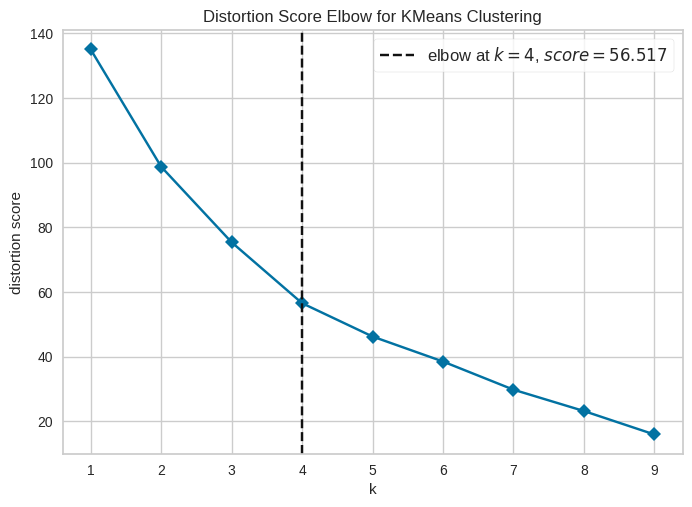

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

k=0
kmeans = KMeans(n_clusters=k, random_state=7)
visualizer = KElbowVisualizer(kmeans, k=(1,10), timings=False)
visualizer.fit(df2.iloc[:,1:])
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=7)

kmeans.fit(df2.iloc[:,1:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=7)

In [ ]:
df2["cluster"] = kmeans.labels_

In [ ]:
df2[df2["cluster"] == 0].to_excel("cluster1.xlsx")

In [ ]:
df2[df2["cluster"] == 0]

,ADSTRD_NM,market,medi,pharm,subway,bus,cctv,police,2030_work,price,cluster
5,화양동,3.139298,1.790461,0.540433,1.641350,0.19720,0.812759,0.707107,1.814921,0.832089,0
4,구의3동,0.591954,1.426546,1.140913,0.345547,0.46611,0.130230,-1.414214,1.959241,0.027603,0


In [ ]:
df2[df2["cluster"] == 1].to_excel("cluster2.xlsx")

In [ ]:
df2[df2["cluster"] == 1]

,ADSTRD_NM,market,medi,pharm,subway,bus,cctv,police,2030_work,price,cluster
8,중곡2동,0.009704,0.771499,0.540433,-0.950255,-0.340619,-0.811190,0.707107,-0.544428,-0.249979,1
7,중곡1동,-0.718108,-0.393028,1.140913,1.641350,-0.206164,-2.129178,0.707107,-0.643299,-0.490930,1
1,자양4동,1.174204,0.771499,1.441153,0.345547,-1.012893,0.247907,0.707107,-0.683167,1.527377,1
0,자양3동,-0.645327,-0.538594,-0.360288,-0.950255,-0.206164,-1.281900,0.707107,-0.626555,0.549595,1
13,자양1동,-0.426983,1.790461,1.741394,-0.950255,-0.878438,-0.693513,0.707107,0.491325,1.117952,1


In [ ]:
df2[df2["cluster"] == 2].to_excel("cluster3.xlsx")

In [ ]:
df2[df2["cluster"] == 2]

,ADSTRD_NM,market,medi,pharm,subway,bus,cctv,police,2030_work,price,cluster
10,중곡4동,-0.063077,-0.684160,-1.261009,-0.950255,1.810658,1.307005,0.707107,-0.994929,-1.514512,2
9,중곡3동,-0.718108,-1.120857,-0.960769,0.345547,0.197200,0.930437,0.707107,-0.963035,-0.771471,2
3,구의2동,-0.426983,-0.465811,-0.360288,-0.950255,0.062746,1.071650,0.707107,-0.752536,-0.789426,2
12,광장동,-0.645327,-0.829726,-0.960769,0.345547,2.482932,0.530333,0.707107,1.584488,-2.055166,2


In [ ]:
df2[df2["cluster"] == 3].to_excel("cluster4.xlsx")

In [ ]:
df2[df2["cluster"] == 3]

,ADSTRD_NM,market,medi,pharm,subway,bus,cctv,police,2030_work,price,cluster
14,자양2동,-0.499765,-0.756943,-0.960769,-0.950255,-0.609528,0.012552,-1.414214,-0.578714,1.289694,3
11,능동,-0.936452,-1.193640,-1.261009,1.641350,-1.416257,-1.399578,-1.414214,-0.451139,-0.060492,3
6,군자동,0.228048,-0.029113,-0.660529,-0.950255,0.331655,0.930437,-1.414214,0.667539,-0.227295,3
2,구의1동,-0.063077,-0.538594,0.240192,0.345547,-0.878438,0.342049,-1.414214,-0.279709,0.814962,3


In [ ]:
df2["importance"] = df2["price"] * 0.208 + (df2["subway"] + df2["bus"]) * 0.542 + df2["market"] * 0.125 + (df2["medi"] + df2["pharm"]) * 0.042 + (df2["cctv"] + df2["police"]) * 0.083

In [ ]:
df2[df2["cluster"] == 0]

,ADSTRD_NM,market,medi,pharm,subway,bus,cctv,police,2030_work,price,cluster,importance
5,화양동,3.139298,1.790461,0.540433,1.641350,0.19720,0.812759,0.707107,1.814921,0.832089,0,1.786027
4,구의3동,0.591954,1.426546,1.140913,0.345547,0.46611,0.130230,-1.414214,1.959241,0.027603,0,0.520917
